In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

For executing it, just run all the cells in order

### A, B

With the first configuration, the particle converges to the position x = 15.0
With the second configuration, the particle converges to the position x = -100.3448376229819


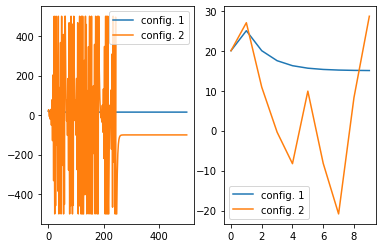

In [2]:
def fitness(pos):
        return 1/((pos)**2)

class particle():
    def __init__(self,name,pos,velocity):
        self.name = name
        self.pos = pos
        self.velocity = velocity
        self.personal_best_pos = pos

    def set_global_best(self, pos):
        self.global_best = pos

    def check_if_in_bounds(self):
        if self.pos > 500:
            self.pos = 500
        if self.pos < -500:
            self.pos = -500
        
    def move(self):
        old_pos = self.pos
        self.pos = self.pos + self.velocity
        if fitness(self.pos) > fitness(old_pos):
            self.personal_best_pos = self.pos
        self.check_if_in_bounds()

    def update(self, momentum=1, alpha1=1, alpha2=1, r1=.5, r2=.5):
        self.velocity = momentum * self.velocity + r1*alpha1*(self.personal_best_pos - self.pos) + r2*alpha2*(self.personal_best_pos - self.pos)
        self.move()

p1 = particle("Particle",20,10)
hist1 = [p1.pos]  
p2 = particle("Particle",20,10)
hist2 = [p2.pos]

for i in range(500):
    p1.update(0.5,1.5,1.5,.5,.5)
    # print(p.pos)
    hist1.append(p1.pos)

    p2.update(0.7,1.5,1.5,1,1)
    # print(p.pos)
    hist2.append(p2.pos)

fig, axs = plt.subplots(1,2)
axs[0].plot(hist1, label="config. 1")
axs[0].plot(hist2, label="config. 2")
axs[0].legend()

axs[1].plot(hist1[0:10], label="config. 1")
axs[1].plot(hist2[0:10], label="config. 2")
axs[1].legend()

print(f"With the first configuration, the particle converges to the position x = {hist1[-1]}")
print(f"With the second configuration, the particle converges to the position x = {hist2[-1]}")





### C

If we consider a single member swarm, the formula for calculating the velocity of a particle i becomes like this:

It's only 1 particle so the personal best of the particle is also the global best so: $x_{i}^{*} = x^*$

$v_i = w*v_i + \alpha _1 r_1 (x^{*} - x_i) + \alpha _2 r_2 (x^{*} - x_i)$

So if we have a w<1, that is always decreasing the velocity that the particle has at any moment. We can see what would happen in the previous plot:

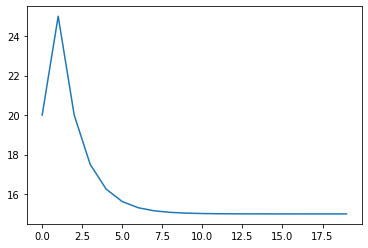

In [3]:
plt.plot(hist1[0:20], label="config. 1")

At first we can see a "bounce", because $\alpha _1 r_1 (x^{*} - x_i) + \alpha _2 r_2 (x^{*} - x_i)$ will be opossite to the velocity that it has at that moment, and afterwards the particle keeps moving to the optimum, so for each iteration we have:

$x^{*} = x_i \rightarrow v_i = w*v_i +0 +0 \rightarrow v_i = w*v_i$

The particle at that point is having its velocity decreased because of w, so it ends up stopping (In the former case before reaching the global optimum)